# EDA

На этом занятии мы научимся проводить исследовательский анализ данных на примере датасета клиентов банка.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

## Обзор данных

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df['CustomerId'].duplicated().sum()

0

In [6]:
df['Surname'].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Аналитическая часть

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


### Численные значения
### CreditScore

In [10]:
import matplotlib.pyplot as plt

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

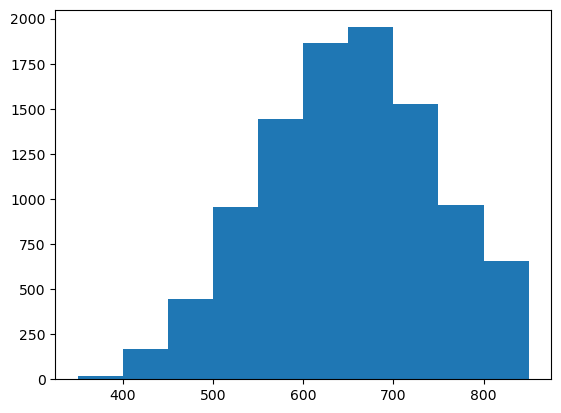

In [11]:
plt.hist(df['CreditScore'])

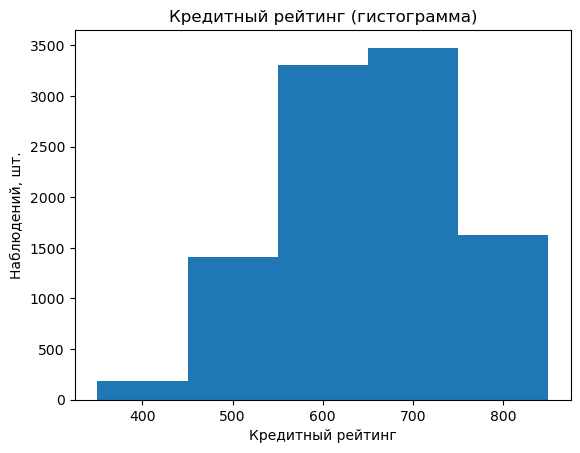

In [12]:
plt.title("Кредитный рейтинг (гистограмма)")
plt.xlabel("Кредитный рейтинг")
plt.ylabel("Наблюдений, шт.")
plt.hist(df['CreditScore'], bins=5);

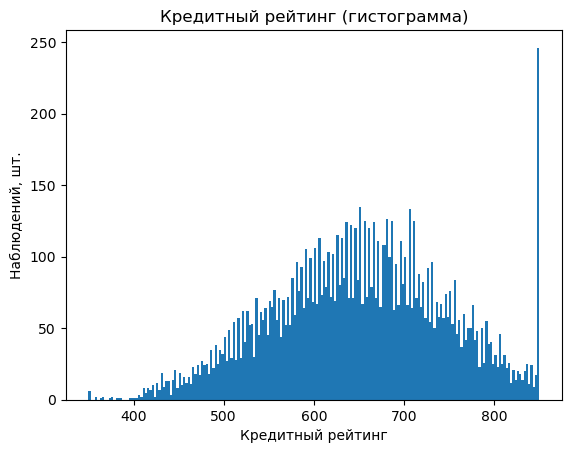

In [13]:
plt.title("Кредитный рейтинг (гистограмма)")
plt.xlabel("Кредитный рейтинг")
plt.ylabel("Наблюдений, шт.")
plt.hist(df['CreditScore'], bins=200);

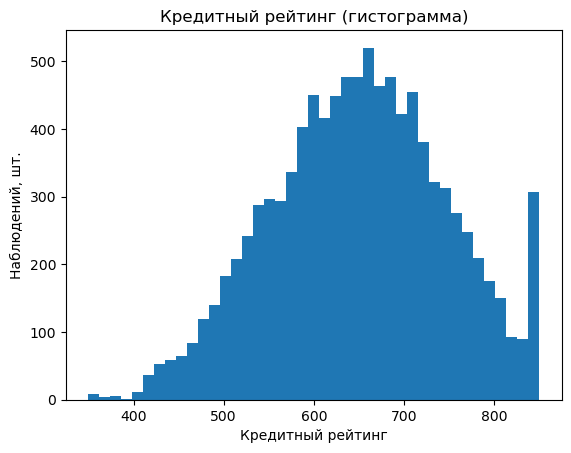

In [14]:
plt.title("Кредитный рейтинг (гистограмма)")
plt.xlabel("Кредитный рейтинг")
plt.ylabel("Наблюдений, шт.")
plt.hist(df['CreditScore'], bins='fd'); # 'auto'

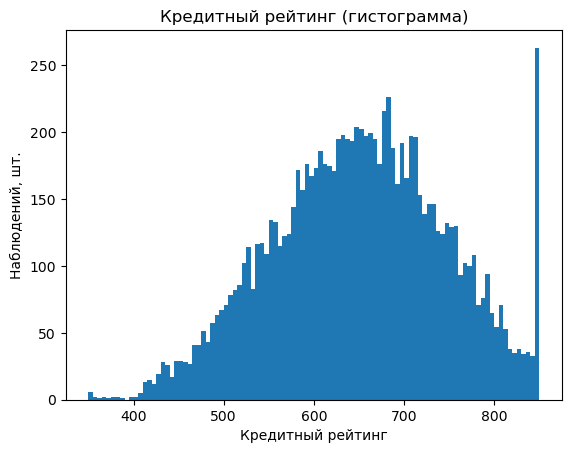

In [15]:
plt.title("Кредитный рейтинг (гистограмма)")
plt.xlabel("Кредитный рейтинг")
plt.ylabel("Наблюдений, шт.")
plt.hist(df['CreditScore'], bins='sqrt');

https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges

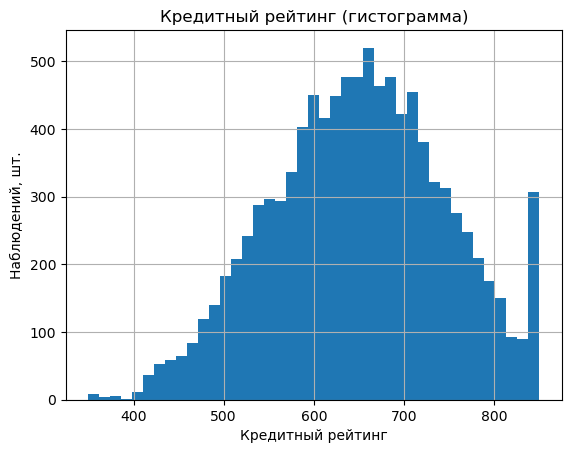

In [16]:
df['CreditScore'].hist(bins='auto').set(xlabel='Кредитный рейтинг', ylabel='Наблюдений, шт.', title='Кредитный рейтинг (гистограмма)');

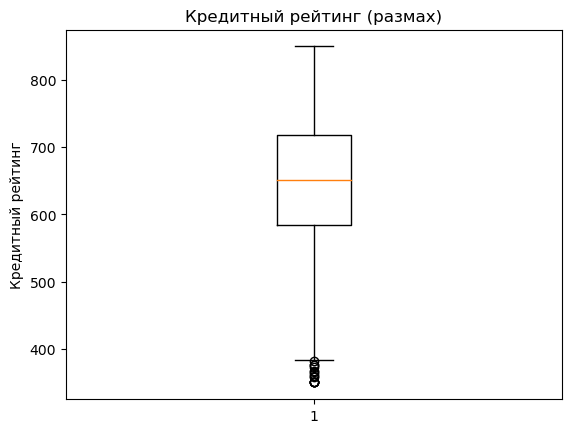

In [17]:
plt.title("Кредитный рейтинг (размах)")
plt.ylabel("Кредитный рейтинг")
plt.boxplot(df['CreditScore']);

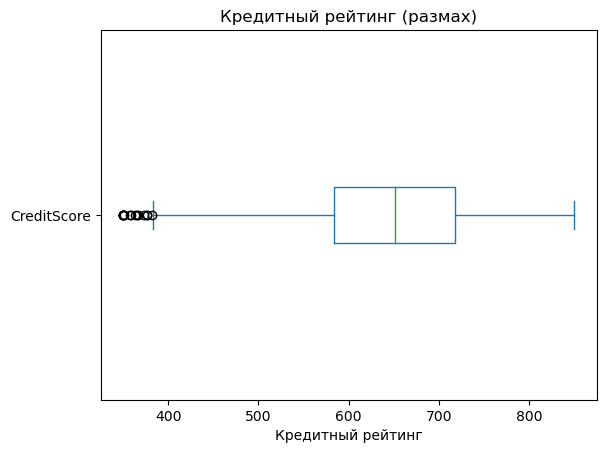

In [18]:
df['CreditScore'].plot(kind='box', vert=False).set(xlabel='Кредитный рейтинг', title='Кредитный рейтинг (размах)');

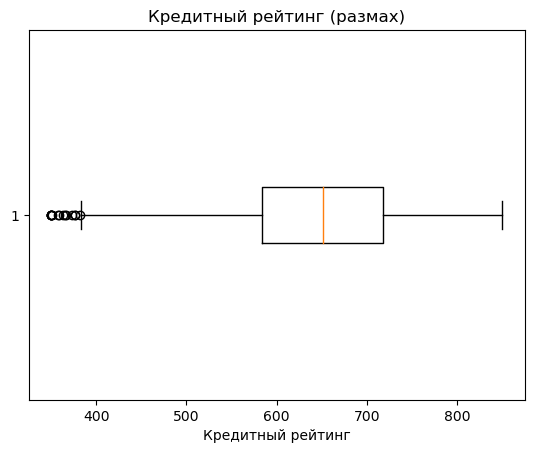

In [19]:
plt.title("Кредитный рейтинг (размах)")
plt.xlabel("Кредитный рейтинг")
plt.boxplot(df['CreditScore'], vert=False);

In [20]:
df[['CreditScore']].describe()

,CreditScore
count,10000.000000
mean,650.528800
std,96.653299
min,350.000000
25%,584.000000
50%,652.000000
75%,718.000000
max,850.000000


In [21]:
import seaborn as sns

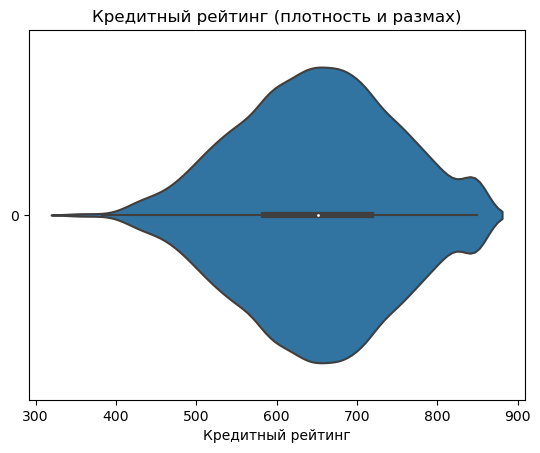

In [22]:
sns.violinplot(df['CreditScore'], orient='h');
plt.title("Кредитный рейтинг (плотность и размах)");
plt.xlabel("Кредитный рейтинг");

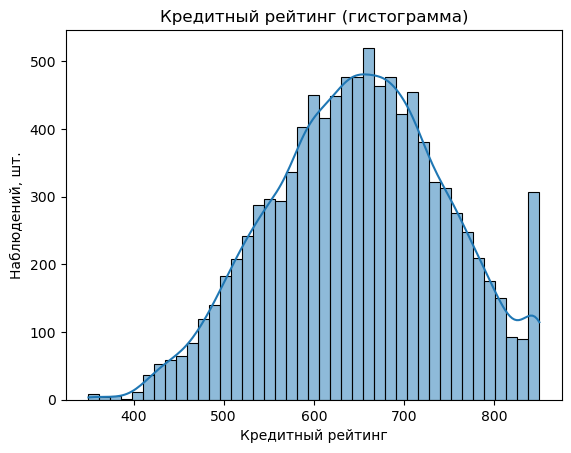

In [23]:
sns.histplot(df['CreditScore'], kde=True);
plt.title("Кредитный рейтинг (гистограмма)");
plt.xlabel("Кредитный рейтинг");
plt.ylabel("Наблюдений, шт.");

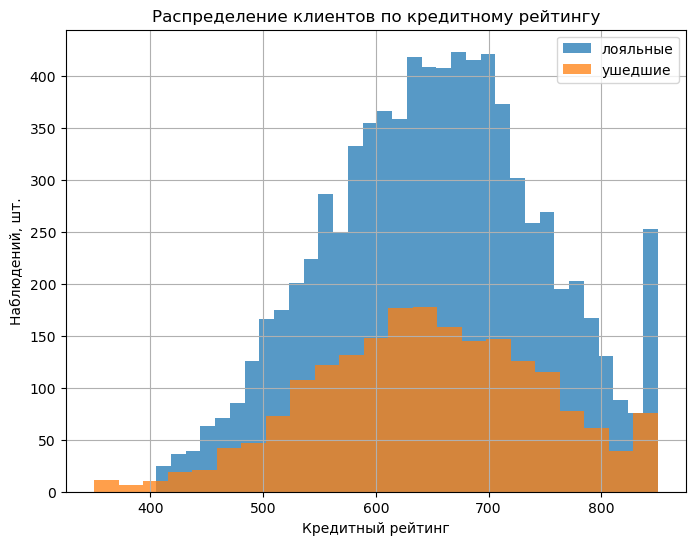

In [24]:
df.groupby('Exited')['CreditScore'].hist(bins='fd', figsize=(8,6), alpha=0.75)
plt.title("Распределение клиентов по кредитному рейтингу")
plt.xlabel("Кредитный рейтинг")
plt.ylabel("Наблюдений, шт.")
plt.legend(['лояльные', 'ушедшие']);

#### Вывод:

Значения кредитного рейтинга распределены околонормально от 350 до 850, за исключением повышенного количества клиентов с максимальным значением (видимо, рейтинг ограничен сверху). Также немного выбиваются из общей картины несколько клиентов с очень низким рейтингом (ниже 375).

Сильной разницы в кредитном рейтинге между лояльными и ушедшими клиентами не наблюдается.

In [25]:
translations = {
    'CreditScore' : 'Кредитный рейтинг',
    'Age' : 'Возраст',
}

def visualize(column, xlim=None):
    xlabel = translations.get(column.name, column.name)
    fig, axes = plt.subplots(1, 2, figsize=(16,6))
    sns.histplot(column, ax=axes[0], bins=25, kde=False)
    axes[0].set(title='Гистограмма', xlabel=xlabel, ylabel='Наблюдений, шт.', xlim=xlim);
    sns.violinplot(column, ax=axes[1], orient='h')
    axes[1].set(title='Плотность и размах', xlabel=xlabel, xlim=xlim);

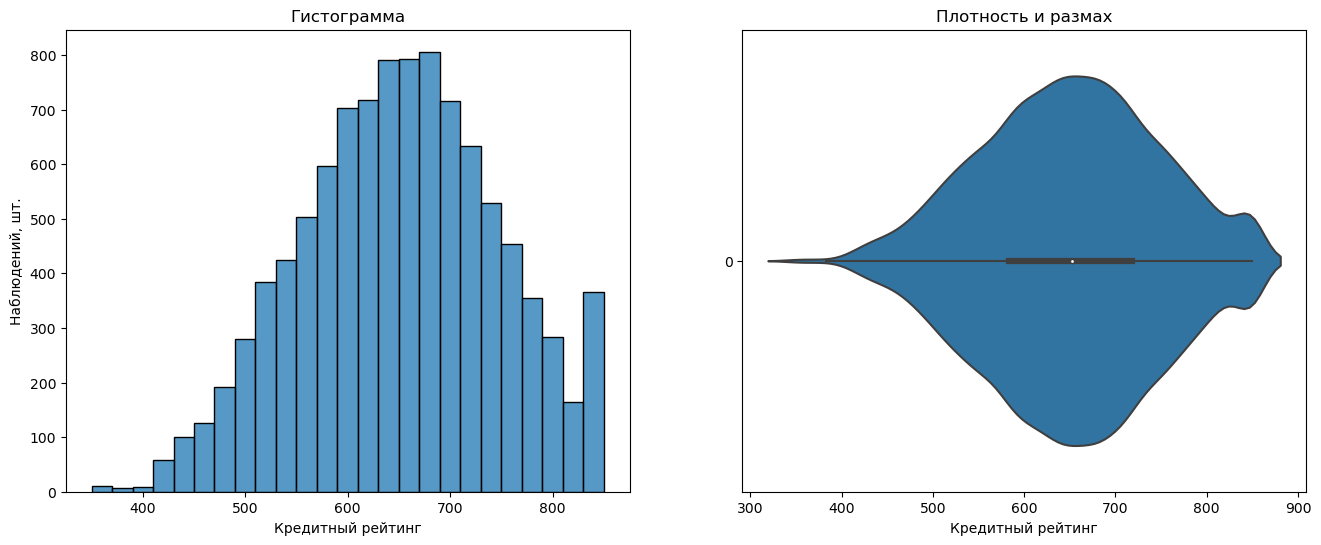

In [26]:
visualize(df['CreditScore'])

### Возраст

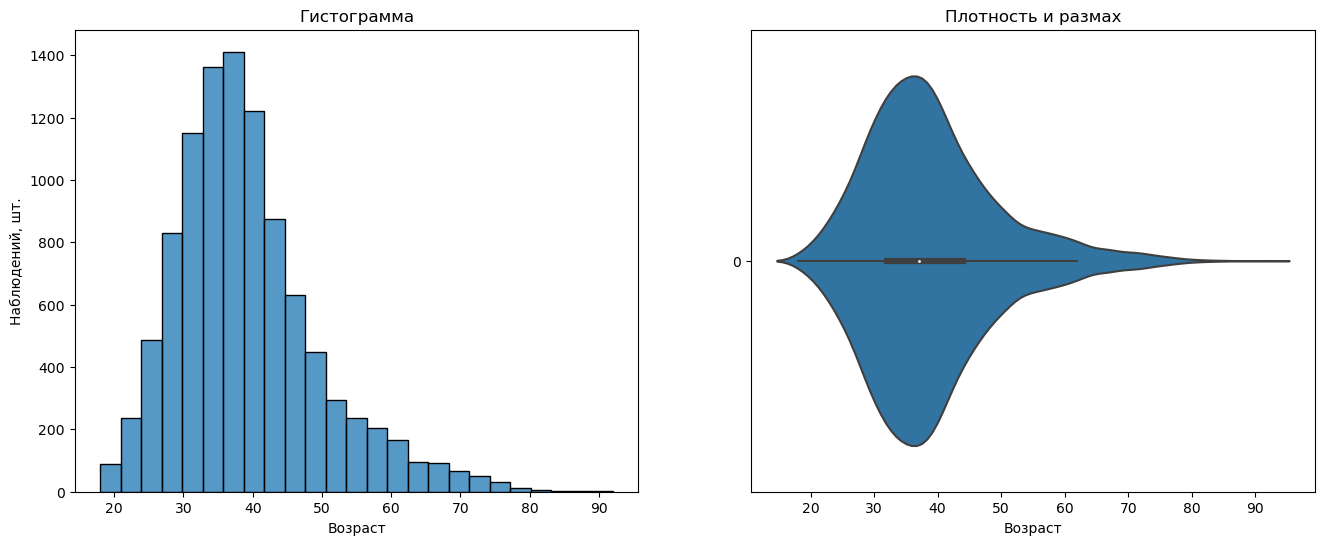

In [27]:
visualize(df['Age'])

In [28]:
df[['Age']].describe()

,Age
count,10000.000000
mean,38.921800
std,10.487806
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,92.000000


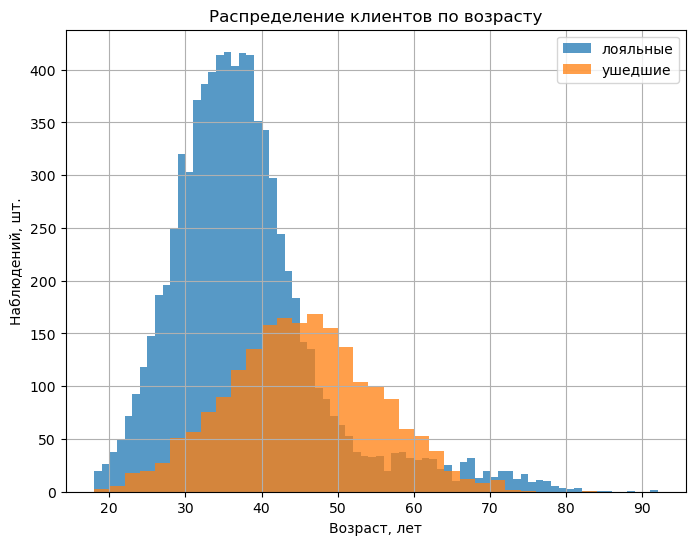

In [29]:
df.groupby('Exited')['Age'].hist(bins='fd', figsize=(8,6), alpha=0.75)
plt.title("Распределение клиентов по возрасту")
plt.xlabel("Возраст, лет")
plt.ylabel("Наблюдений, шт.")
plt.legend(['лояльные', 'ушедшие']);

In [30]:
    df.groupby('Exited')['Age'].agg(['count', 'mean', 'median'])

,count,mean,median
Exited,,,
0,7963,37.408389,36.0
1,2037,44.837997,45.0


#### Вывод:

Данные о возрасте выглядят достоверно, клиентам от 18 до 92 лет, но большинство не старше 44 лет при среднем значении около 39 (37 по медиане).

Сравнение групп показывает, что риск оттока клиента повышается с возрастом (средний возраст лояльных клиентов 36-37 лет, а ушедших - около 45 лет.)

### Самостоятельная работа:

Проанализируйте другие столбцы, например, `Balance`.

In [31]:
# Ваш код:


### Категории и бинарные значения

In [32]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

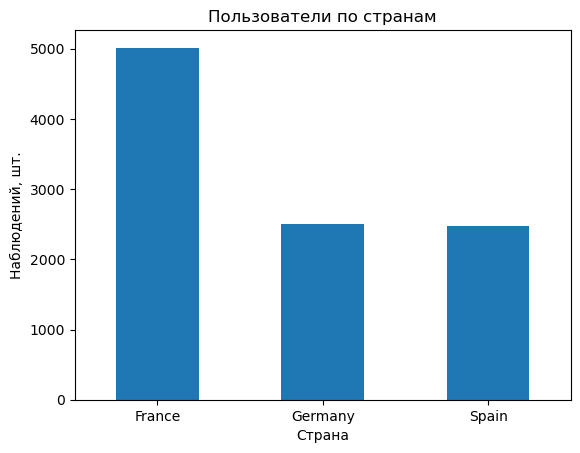

In [33]:
df['Geography'].value_counts().plot(kind='bar', rot=0).set();
plt.title("Пользователи по странам");
plt.xlabel("Страна");
plt.ylabel("Наблюдений, шт.");

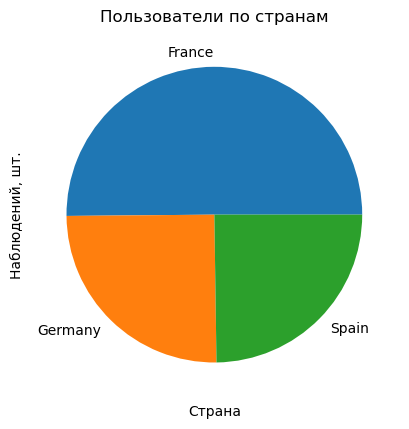

In [34]:
df['Geography'].value_counts().plot(kind='pie', rot=0).set();
plt.title("Пользователи по странам");
plt.xlabel("Страна");
plt.ylabel("Наблюдений, шт.");

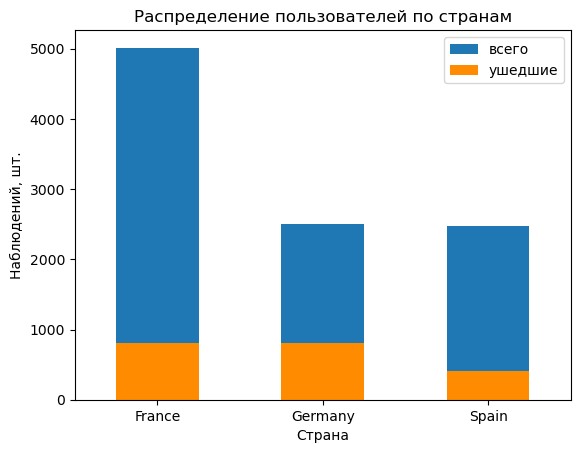

In [35]:
df.groupby('Geography')['Exited'].count().plot(kind='bar', rot=0);
df.groupby('Geography')['Exited'].sum().plot(kind='bar', color='darkorange', rot=0);
plt.title("Распределение пользователей по странам");
plt.xlabel("Страна");
plt.ylabel("Наблюдений, шт.")
plt.legend(['всего', 'ушедшие']);

### Самостоятельная работа:

Проанализируйте другие категории например, `NumOfProducts`.

In [36]:
# Ваш код:


### Взаимное влияние признаков

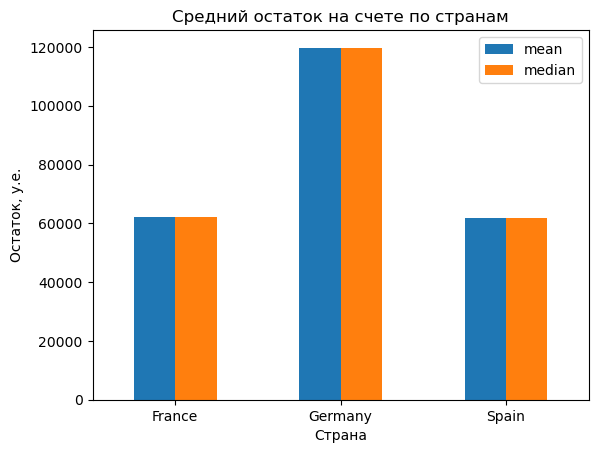

In [37]:
df.groupby(['Geography'])['Balance'].agg(['mean', 'median']).plot(kind='bar', rot=0);
plt.title("Средний остаток на счете по странам");
plt.xlabel("Страна");
plt.ylabel("Остаток, у.е.");

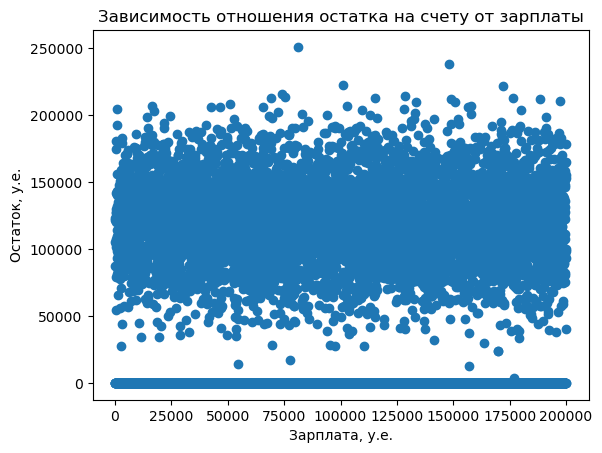

In [38]:
plt.scatter(df['EstimatedSalary'], df['Balance']);
plt.title("Зависимость отношения остатка на счету от зарплаты");
plt.xlabel("Зарплата, у.е.");
plt.ylabel("Остаток, у.е.");

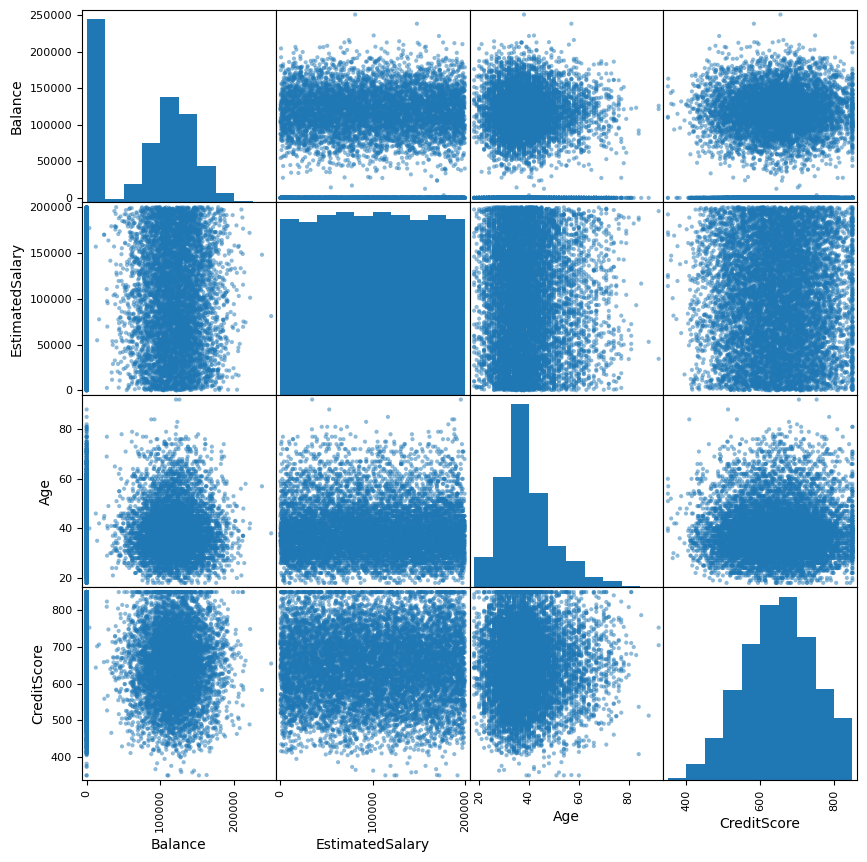

In [39]:
pd.plotting.scatter_matrix(df[['Balance', 'EstimatedSalary', 'Age', 'CreditScore']], figsize=(10, 10));

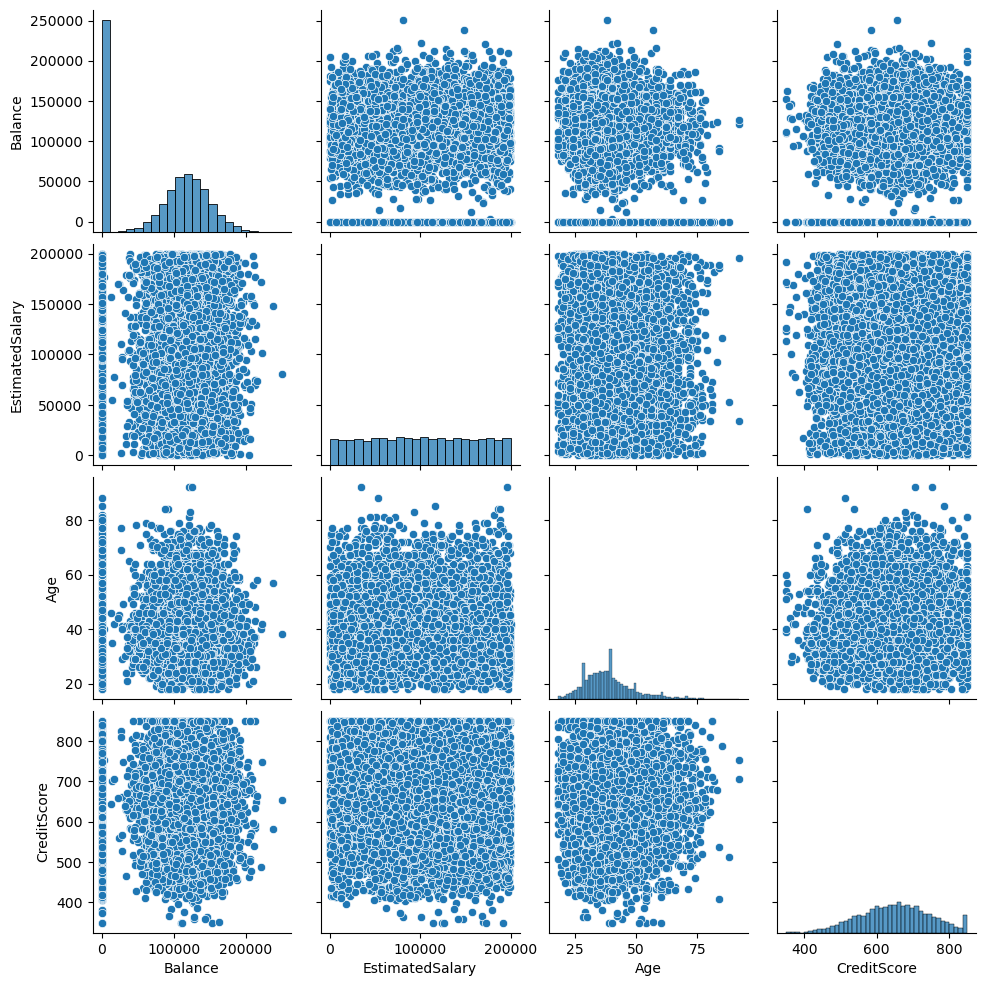

In [40]:
sns.pairplot(df[['Balance', 'EstimatedSalary', 'Age', 'CreditScore']]);

In [41]:
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

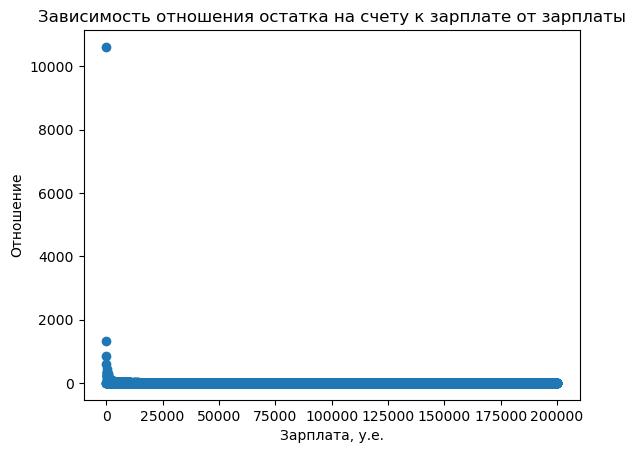

In [42]:
plt.scatter(df['EstimatedSalary'], df['BalanceSalaryRatio']);
plt.title("Зависимость отношения остатка на счету к зарплате от зарплаты");
plt.xlabel("Зарплата, у.е.");
plt.ylabel("Отношение");

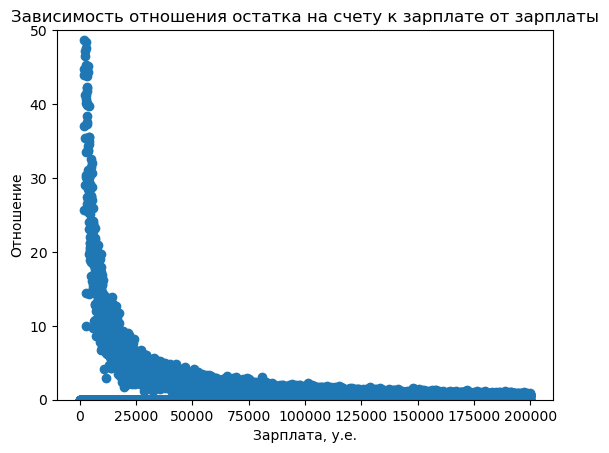

In [43]:
plt.scatter(df['EstimatedSalary'], df['BalanceSalaryRatio']);
plt.title("Зависимость отношения остатка на счету к зарплате от зарплаты");
plt.xlabel("Зарплата, у.е.");
plt.ylabel("Отношение");
plt.ylim(0, 50);

In [44]:
df.query('BalanceSalaryRatio > 50').sort_values(by='BalanceSalaryRatio', ascending=False).head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio
2362,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1,10614.655440
9010,645,Germany,Female,59,8,121669.93,2,0,0,91.75,1,1326.102779
7565,708,France,Male,52,10,105355.81,1,1,0,123.07,1,856.064110
8722,621,France,Male,35,7,87619.29,1,1,0,143.34,0,611.268941
1462,616,Germany,Female,41,1,103560.57,1,1,0,236.45,1,437.980842
3446,649,France,Male,37,9,87374.88,2,1,1,247.36,0,353.229625
2046,520,Germany,Male,34,8,120018.86,2,1,1,343.38,0,349.521987
6956,571,France,Male,49,4,180614.04,1,0,0,523.00,0,345.342333
5120,663,France,Male,26,5,141462.13,1,1,0,440.20,0,321.358769
195,807,France,Male,35,3,174790.15,1,1,1,600.36,0,291.142231


# Домашнее задание

## Easy

Проведите иссдедовательский анализ одного из признаков, не исследованных вами на уроке. Вкратце опишите свои наблюдения.

In [45]:
# Ваш код ниже:


Вывод: 

## Normal

Исследуйте другой похожий датасет: отток клиентов мобильного оператора.

In [54]:
df = pd.read_csv('telecom_churn.csv')

In [55]:
df.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Ваша цель - численные столбцы (`ClientPeriod`, `MonthlySpending`, `TotalSpent`).

- ознакомьтесь с данными и проведите необходимую предобработку;
- проведите исследовательский анализ трех указанных выше признаков (распределение в целом и по лояльным/ушедшим клиентам);
- оцените взаимозависимость признаков с помощью матрицы рассеяния.

Не забывайте снабжать графики краткими выводами.

In [47]:
# Ваш код ниже:


Вывод: 

## Hard

Исследуйте датасет "Титаник":

In [48]:
df = pd.read_csv('titanic.csv')

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Подумайте, от каких признаков могли зависеть шансы пассажира спастись (столбец `Survived`)? Проведите исследовательский анализ и выделите хотя бы один, а лучше больше таких признаков.

На базе этих признаков постройте логическое выражение, предсказывающее, выжил ли пассажир, и запишите результат в столбец `Predicted`. Например:

`df['Predicted'] = (df['Столбец_1'] == 'значение') & (df['Столбец_2'] < 42)`

При работе с логическими масками используются [побитовые логические операции](https://docs-python.ru/tutorial/operatsii-chislami-python/bitovye-operatsii-chislami/). Также можно использовать построчный `apply()`.

Ваша задача - построить выражение, дающее точность (accuracy) заметно выше бейзлайна.

### Baseline

Как известно, большинство пассажиров не выжило. Поэтому объявим бейзлайном "все умерли":

In [50]:
df['Predicted'] = 0

Метрика accuracy соответсвует общей доле правильных ответов:

In [51]:
sum(df['Predicted'] == df['Survived']) / len(df)

0.6161616161616161

Таким образом, базовая точность составляет около 62%.

Не забудьте написать краткий вывод!